# In this file we assume no expert knowledgde was available and therefore illustrate how a model can be found automatically using Genetic Programming

Essentially to run this file:
    
- you need the file evolutiongp_multi__.py which is located in the modules folder
- you need to install the simpful package from https://github.com/Nikhilrs1993/simpful

### Imports

In [1]:
import numpy as np
from simpful import *
from modules.evolutiongp_multi__ import FuzzyEvolution
from matplotlib import pyplot as plt
from numpy import load
import pickle
import time
from math import isclose

### Helper Functions

In [2]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)


def pad_or_truncate(some_list, target_len):
    return some_list[:target_len] + [0]*(target_len - len(some_list))

### Initialization Information

In [3]:
# load X_train observation_based
X = np.load('./inputs_processed_/X_train.npy')

# X_test observation bassed
X_T = np.load('./inputs_processed_/X_test.npy')

# correspinding y_train and test
y = np.load("./inputs_processed_/y_train.npy").tolist()
y = [item for sublist in y for item in sublist]
y_test = np.load("./inputs_processed_/y_test.npy").tolist()
y_test = [item for sublist in y_test for item in sublist]

# Initialize using var_names/ consequents/ cond_probs/ cluster_centers
vars = ['passclass', 'sex', 'age', 'sibling', 'parentchild', 'fare', 'embarked']
consequents = ['DEATH', 'ALIVE']
average_fitness = []
population_size = []

### Evolution

For oversight we will walk through the start, middle and end seperately here for oversight.

#### Initialisation (Generation 1)

In [4]:
start = time.process_time()
genes, survivin, avg, pop = FuzzyEvolution.initialisor(
    population_=100, all_vars=vars, X=X, X_T=X_T, y=y, y_test=y_test, consequents=consequents, thresh=5)
average_fitness.append(avg)
population_size.append(pop)

#### Evolute until condition is met (User defined)

In this case we choose:

1. If 100 generations is met: STOP
2. if the fitness is changing by less than: 0.005, also STOP
3. we do a minimum of 30 generations

In [5]:
done = False
counter = 0
while done is False:
    genes, survivin, avg, pop = FuzzyEvolution.gp_evolve(
        genes, all_vars=vars, X=X, X_T=X_T, y=y, y_test=y_test, consequents=consequents, surviving_individuals=survivin)
    counter += 1
    average_fitness.append(avg)
    population_size.append(pop)
    if counter > 30:
        average_fitness_rolling = running_mean(average_fitness, 20)
        relevant_no = average_fitness_rolling[-1]
        relevant_no_ = average_fitness[-1]
        if isclose(relevant_no, relevant_no_, abs_tol=0.005):
            done = True
    if counter > 100:
        done = True
    
    # time it
    print(time.process_time() - start)

d:\documents\github\simpful\simpful\simpful.py:912: RuntimeWarning: invalid value encountered in true_divide
  normalized_activation_rule = np.divide(rule_outputs, np.sum(rule_outputs))
d:\documents\github\simpful\simpful\simpful.py:878: RuntimeWarning: invalid value encountered in true_divide
  normalized_activation_rule = np.divide(rule_outputs, np.sum(rule_outputs))


165.8125
251.703125
342.0625
431.78125
517.09375
590.421875
654.734375
717.09375
765.1875
812.375
860.453125
905.21875
938.625
963.78125
987.625
1018.515625
1047.375
1073.203125
1094.1875
1116.203125
1142.375
1164.25
1187.046875
1204.625
1223.9375
1243.71875
1263.46875
1279.890625
1294.6875
1310.765625
1328.421875
1342.609375
1355.5625
1369.578125
1386.375
1403.109375


#### Last Generation

In [6]:
best_models = FuzzyEvolution.gp_evaluate(
    genes, all_vars=vars, X=X, X_T=X_T, y=y, y_test=y_test, consequents=consequents, surviving_individuals=survivin)
average_fitness.append(avg)
population_size.append(pop)

# time it
print(time.process_time() - start)

# Keep average fitness per generation
pad_or_truncate(average_fitness, counter+2)

pad_or_truncate(population_size, counter+2)

1418.15625


[101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101]

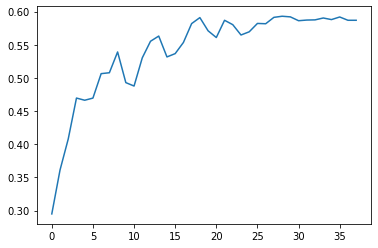

In [7]:
plt.plot(list(range(counter+2)), average_fitness)
plt.show()

In [8]:
save_object(best_models, 'titanic_model_2.pkl')